# Visualization

In [1]:
import sys, os
sys.path.append(os.path.abspath('../'))
from scripts.utils import create_dir, get_runtime
import time 
start_time = time.time()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
# load sa2 shapefile
sa2_gdf = gpd.read_file('../data/landing/sa2/sa2-21-shp/')
sa2_gdf['sa2_code'] = sa2_gdf['SA2_CODE21']
sa2_gdf = sa2_gdf[['sa2_code', 'geometry']]
sa2_gdf


# load rental history/current dataset 2017 - 2024
rental_df = pd.read_csv('../data/raw/rental-17-24.csv')
rental_df = rental_df[
    ['sa2_code', 'suburb', 'bed', 'bath', 'car', 'type', 'year', 'median_income', 'population', 'time_city', 'avg_property_price', 'rented_price']
]
rental_df['sa2_code'] = rental_df['sa2_code'].astype('Int64').astype(str)
rental_df = rental_df.merge(sa2_gdf, on='sa2_code',how='left')
rental_df


house_df = rental_df[rental_df['type'] == 'House']
unit_df = rental_df[rental_df['type'] == 'Unit/apmt']
print('House:', house_df.shape)
print('Unit:', unit_df.shape)


House: (518040, 13)
Unit: (800389, 13)


In [3]:
create_dir("../plots/visualisation_features/")

Created directory: ../plots/visualisation_features/



In [4]:
create_dir("../plots/visualisation_features/House/")
create_dir("../plots/visualisation_features/Unit/")
create_dir("../plots/visualisation_features/All/")

Created directory: ../plots/visualisation_features/House/

Created directory: ../plots/visualisation_features/Unit/

Created directory: ../plots/visualisation_features/All/



## 1. Bedroom

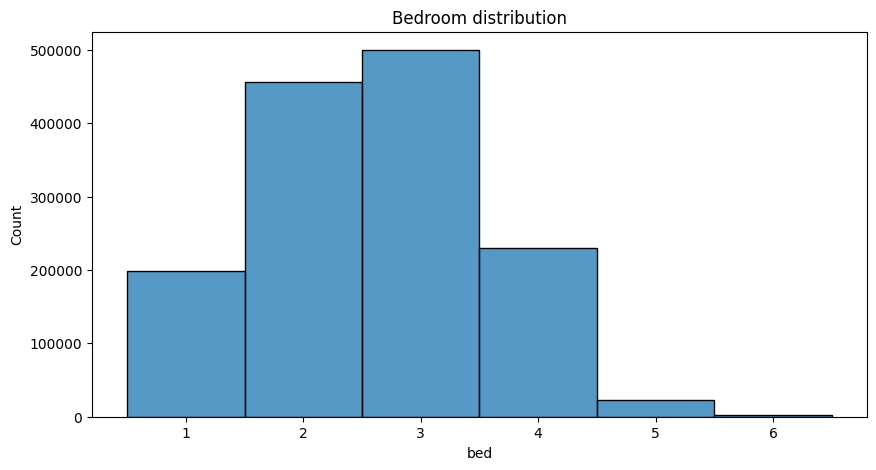

In [5]:
plt.figure(figsize=(10, 5))
plt.title("Bedroom distribution")
sns.histplot(rental_df.bed, discrete=True)
plt.savefig("../plots/visualisation_features/All/1.bedroom_distribution.png")

### House

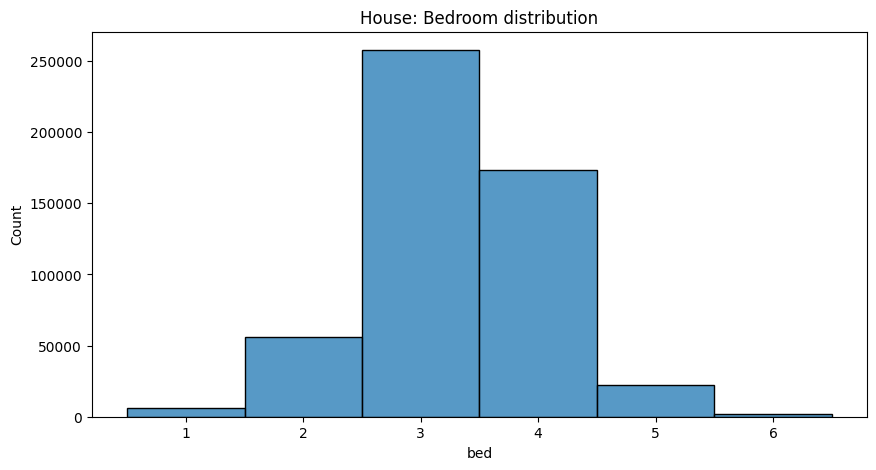

In [6]:
plt.figure(figsize=(10, 5))
plt.title("House: Bedroom distribution")
sns.histplot(house_df.bed, discrete=True)
plt.savefig("../plots/visualisation_features/House/1.House_bedroom_distribution.png")

### Unit

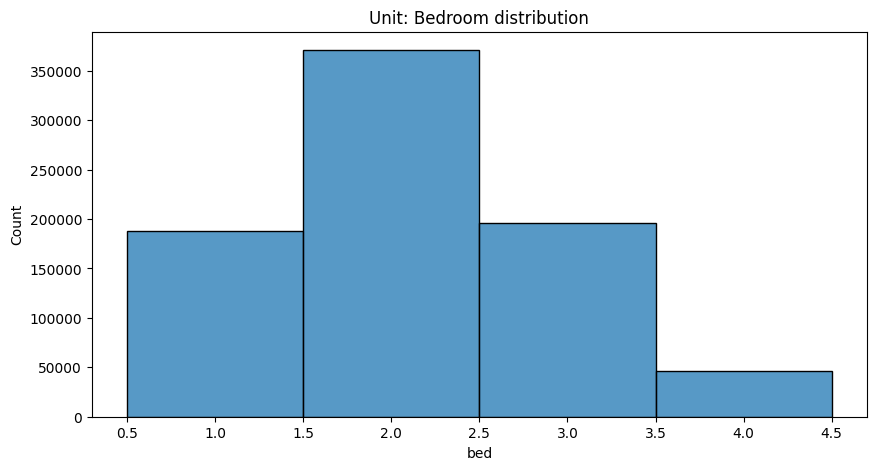

In [7]:
plt.figure(figsize=(10, 5))
plt.title("Unit: Bedroom distribution")
sns.histplot(unit_df.bed, discrete=True)
plt.savefig("../plots/visualisation_features/Unit/1.Unit_bedroom_distribution.png")

## 2. Bathroom

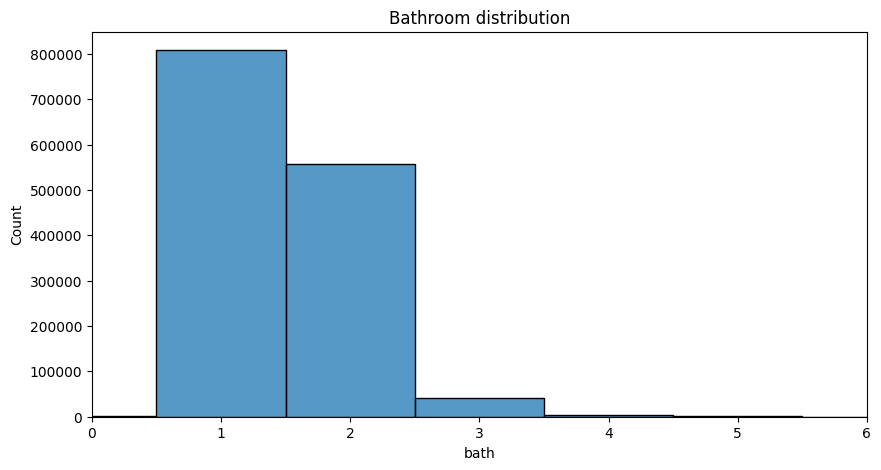

In [8]:
plt.figure(figsize=(10, 5))
plt.title("Bathroom distribution")
sns.histplot(rental_df.bath, discrete=True)
plt.xlim(0, 6)
plt.savefig("../plots/visualisation_features/All/2.bathroom_distribution.png")

### House

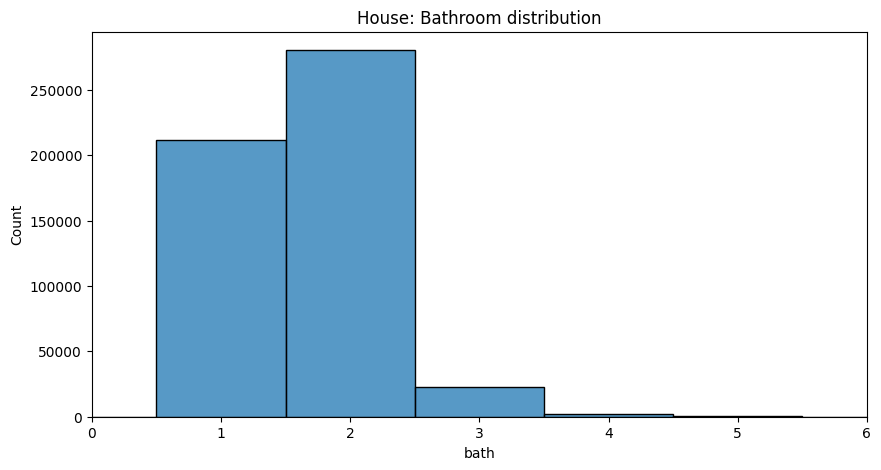

In [9]:
plt.figure(figsize=(10, 5))
plt.title("House: Bathroom distribution")
sns.histplot(house_df.bath, discrete=True)
plt.xlim(0, 6)
plt.savefig("../plots/visualisation_features/House/2.House_bathroom_distribution.png")

### Unit

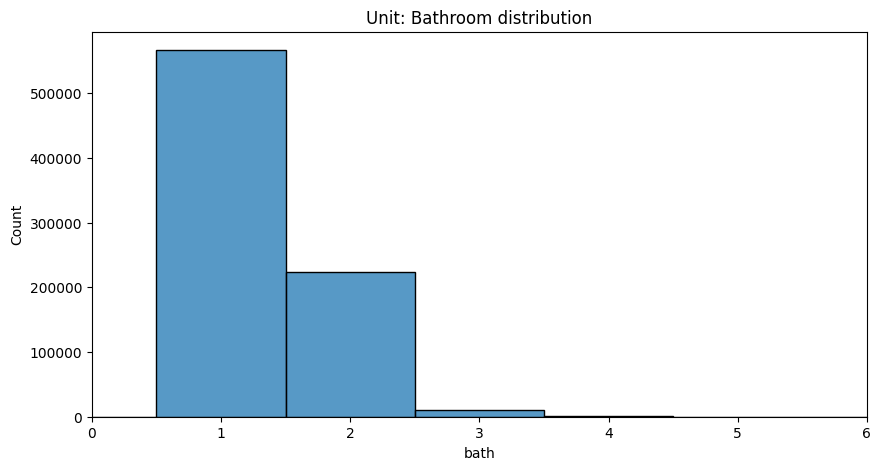

In [10]:
plt.figure(figsize=(10, 5))
plt.title("Unit: Bathroom distribution")
sns.histplot(unit_df.bath, discrete=True)
plt.xlim(0, 6)
plt.savefig("../plots/visualisation_features/Unit/2.Unit_bathroom_distribution.png")

## 3. Car

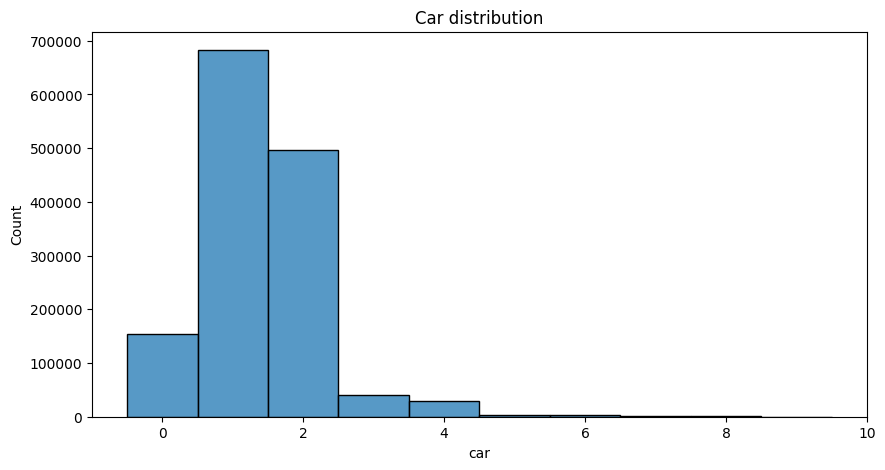

In [11]:
# plot the car distribution
plt.figure(figsize=(10, 5))
plt.title("Car distribution")
sns.histplot(rental_df.car, discrete=True)
plt.savefig("../plots/visualisation_features/All/3.car_distribution.png")

### House

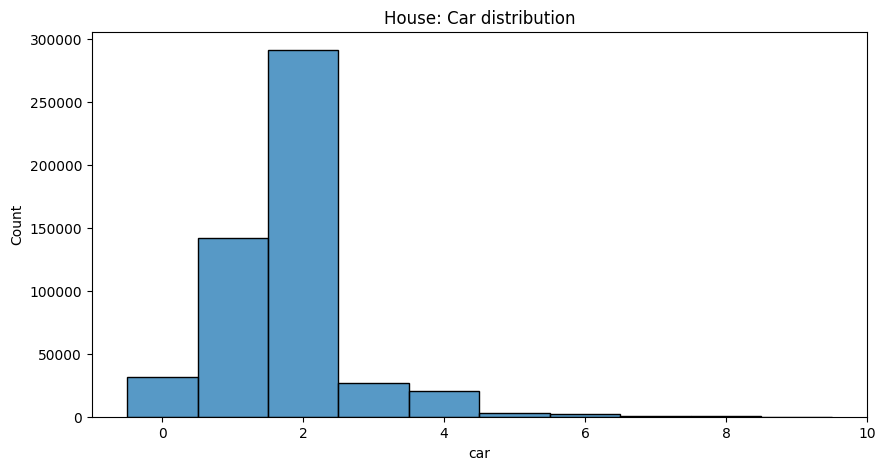

In [12]:
plt.figure(figsize=(10, 5))
plt.title("House: Car distribution")
sns.histplot(house_df.car, discrete=True)
plt.savefig("../plots/visualisation_features/House/3.House_car_distribution.png")

### Unit

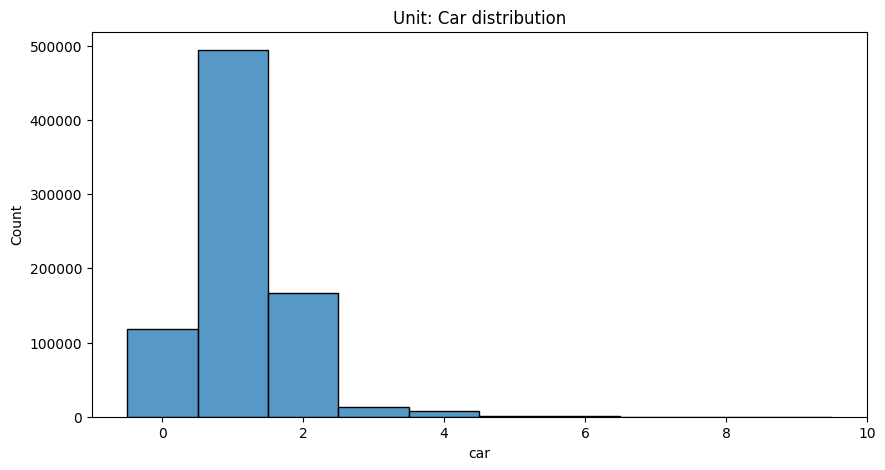

In [13]:
plt.figure(figsize=(10, 5))
plt.title("Unit: Car distribution")
sns.histplot(unit_df.car, discrete=True)
plt.savefig("../plots/visualisation_features/Unit/3.Unit_car_distribution.png")

## 4. Median_Income

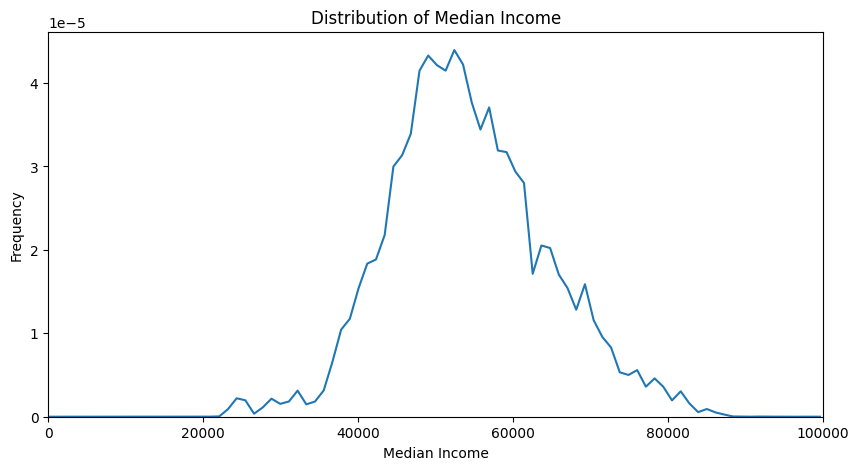

In [14]:
# Median income distribution
plt.figure(figsize=(10, 5))
plt.title("Distribution of Median Income")
sns.kdeplot(rental_df['median_income'])
plt.xlabel("Median Income")
plt.ylabel("Frequency")
plt.xlim(0, 100000)
plt.savefig("../plots/visualisation_features/All/4.median_income_distribution.png")

### House

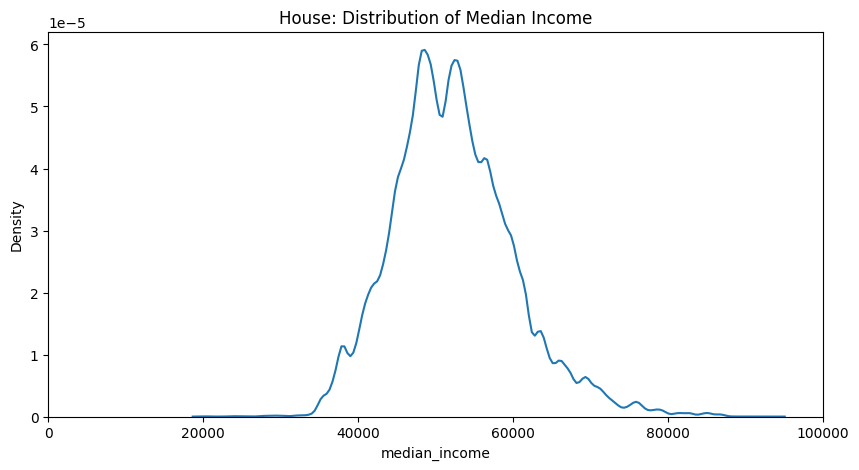

In [15]:
plt.figure(figsize=(10, 5))
plt.title("House: Distribution of Median Income")
sns.kdeplot(house_df['median_income'])
plt.xlim(0, 100000)
plt.savefig("../plots/visualisation_features/House/4.House_median_income_distribution.png")

### Unit

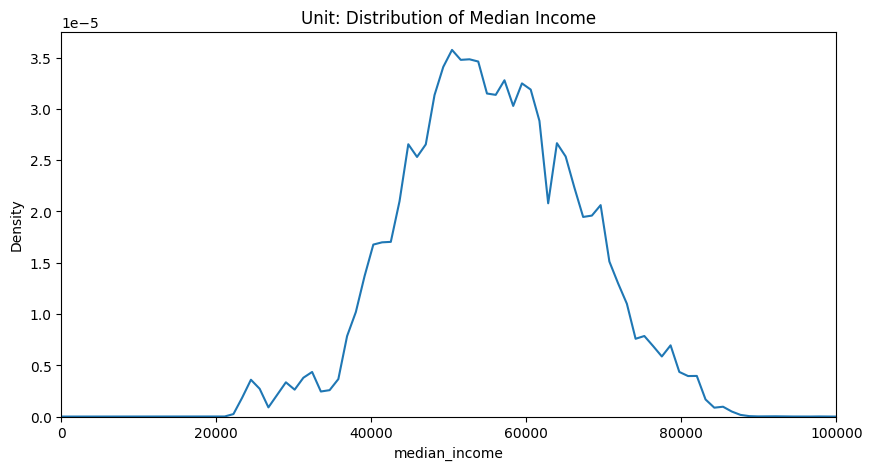

In [16]:
plt.figure(figsize=(10, 5))
plt.title("Unit: Distribution of Median Income")
sns.kdeplot(unit_df['median_income'])
plt.xlim(0, 100000)
plt.savefig("../plots/visualisation_features/Unit/4.Unit_median_income_distribution.png")

## 5. Population

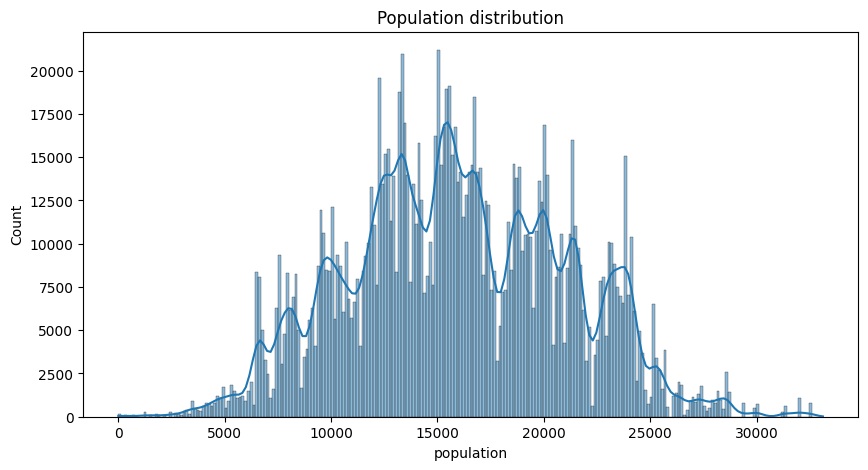

In [17]:
# plot the distribution of population
plt.figure(figsize=(10, 5))
plt.title("Population distribution")
sns.histplot(rental_df.population, kde=True)
plt.show()
# plt.savefig("../plots/visualisation_features/All/5.population_distribution.png")

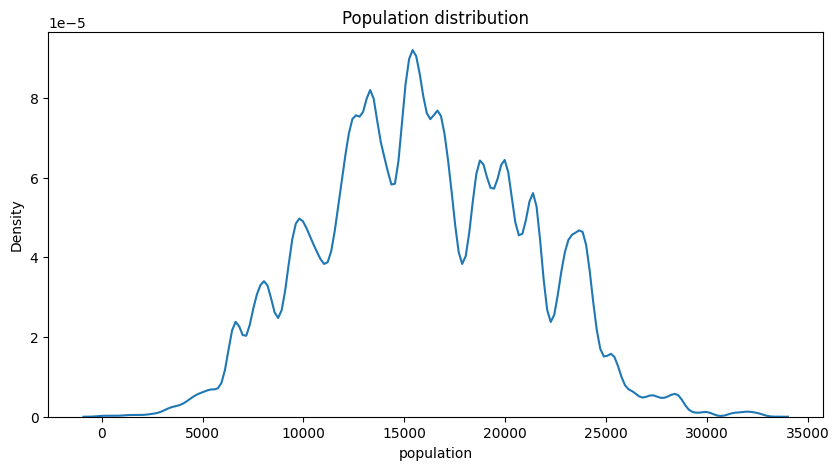

In [18]:
# plot the distribution of population
plt.figure(figsize=(10, 5))
plt.title("Population distribution")
sns.kdeplot(rental_df.population)
plt.savefig("../plots/visualisation_features/All/5.population_distribution.png")

### House

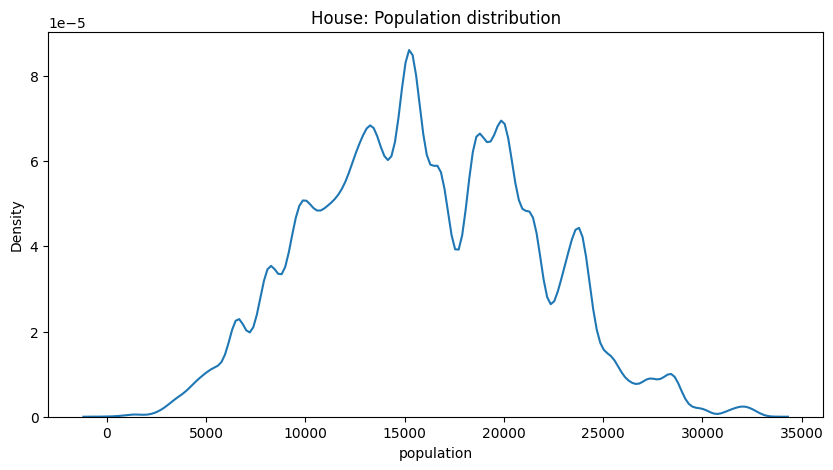

In [19]:
plt.figure(figsize=(10, 5))
plt.title("House: Population distribution")
sns.kdeplot(house_df.population)
plt.savefig("../plots/visualisation_features/House/5.House_population_distribution.png")

### Unit

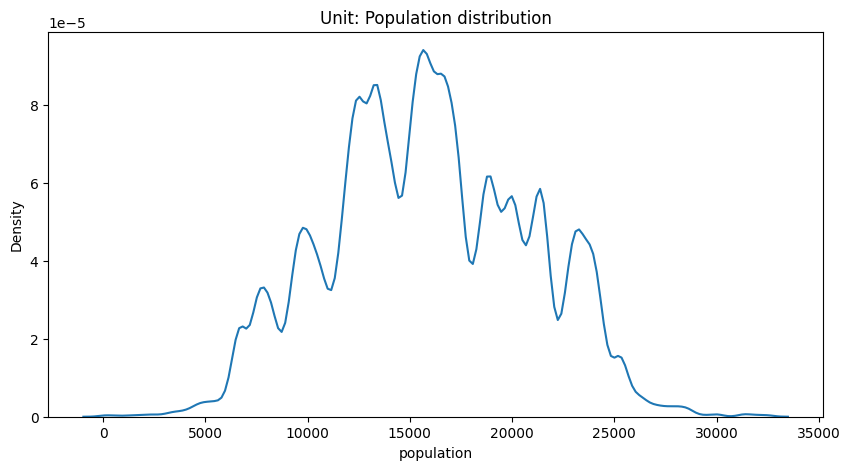

In [20]:
plt.figure(figsize=(10, 5))
plt.title("Unit: Population distribution")
sns.kdeplot(unit_df.population)
plt.savefig("../plots/visualisation_features/Unit/5.Unit_population_distribution.png")

## 6. Time_city

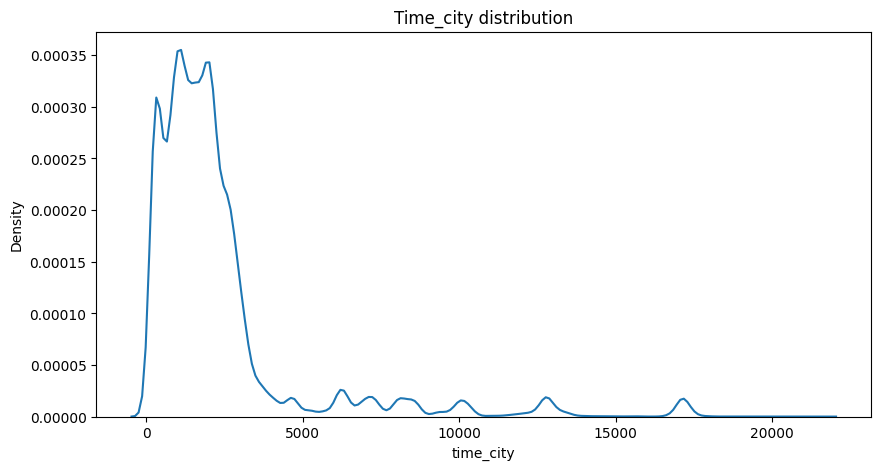

In [21]:
# plot the distribution of time_city
plt.figure(figsize=(10, 5))
plt.title("Time_city distribution")
sns.kdeplot(rental_df.time_city)
plt.savefig("../plots/visualisation_features/All/6.time_city_distribution.png")

### House

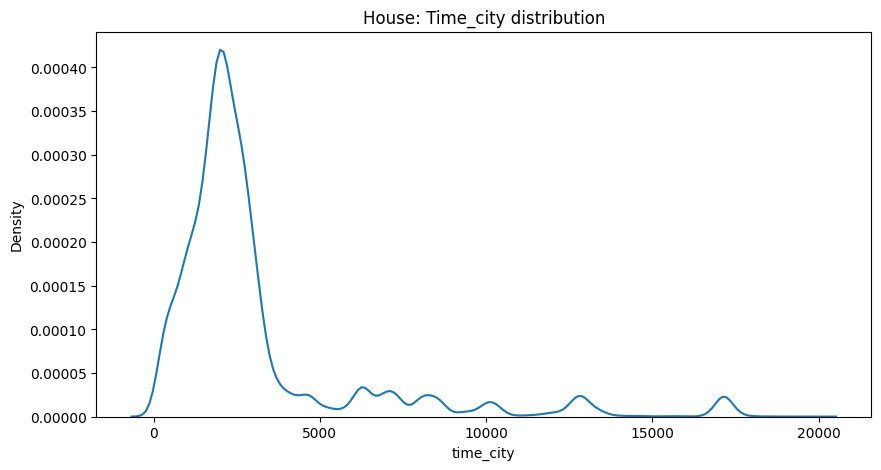

In [22]:
plt.figure(figsize=(10, 5))
plt.title("House: Time_city distribution")
sns.kdeplot(house_df.time_city)
plt.savefig("../plots/visualisation_features/House/6.House_time_city_distribution.png")

### Unit

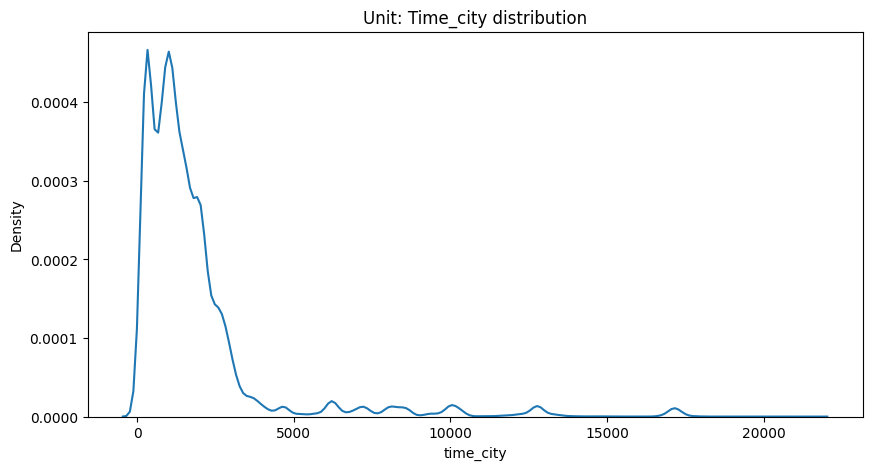

In [23]:
plt.figure(figsize=(10, 5))
plt.title("Unit: Time_city distribution")
sns.kdeplot(unit_df.time_city)
plt.savefig("../plots/visualisation_features/Unit/6.Unit_time_city_distribution.png")

## 7. Rented Price

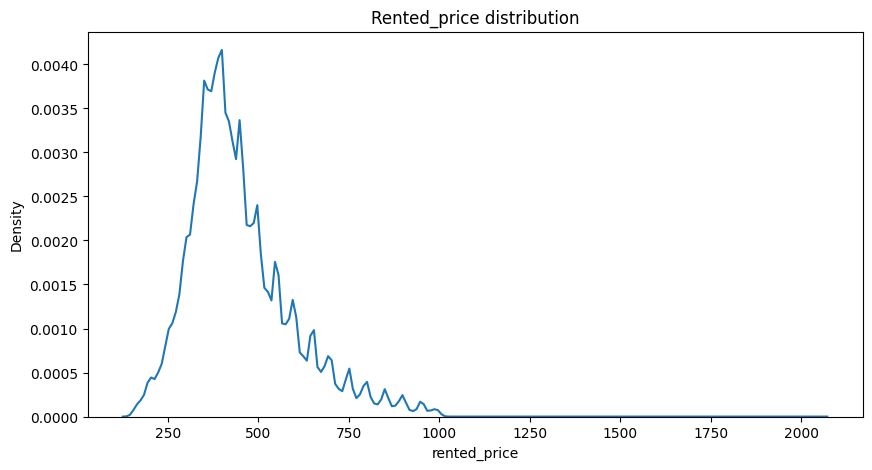

In [24]:
# plot the distribution of rented_price
plt.figure(figsize=(10, 5))
plt.title("Rented_price distribution")
sns.kdeplot(rental_df.rented_price)
plt.savefig("../plots/visualisation_features/All/7.rented_price_distribution.png")

# draw a line that x = 400
# plt.axvline(x=400, color='r', linestyle='--')

### House

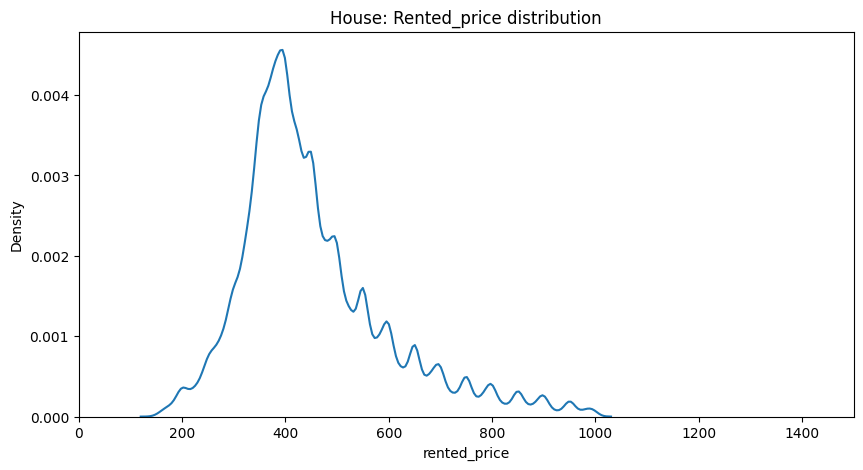

In [25]:
plt.figure(figsize=(10, 5))
plt.title("House: Rented_price distribution")
sns.kdeplot(house_df.rented_price)
plt.xlim(0, 1500)
plt.savefig("../plots/visualisation_features/House/7.House_rented_price_distribution.png")

# plt.axvline(x=391, color='r', linestyle='--')

### Unit

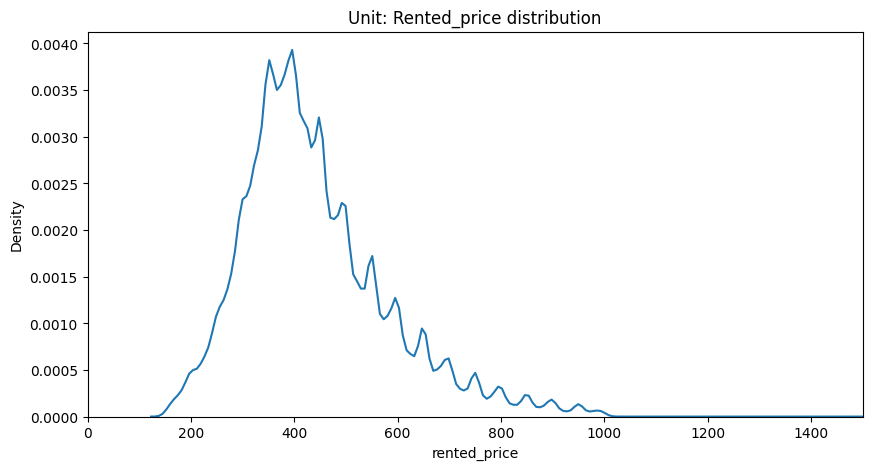

In [26]:
plt.figure(figsize=(10, 5))
plt.title("Unit: Rented_price distribution")
sns.kdeplot(unit_df.rented_price)
plt.xlim(0, 1500)
plt.savefig("../plots/visualisation_features/Unit/7.Unit_rented_price_distribution.png")

# plt.axvline(x=393, color='r', linestyle='--')

## 8. Average Property Price

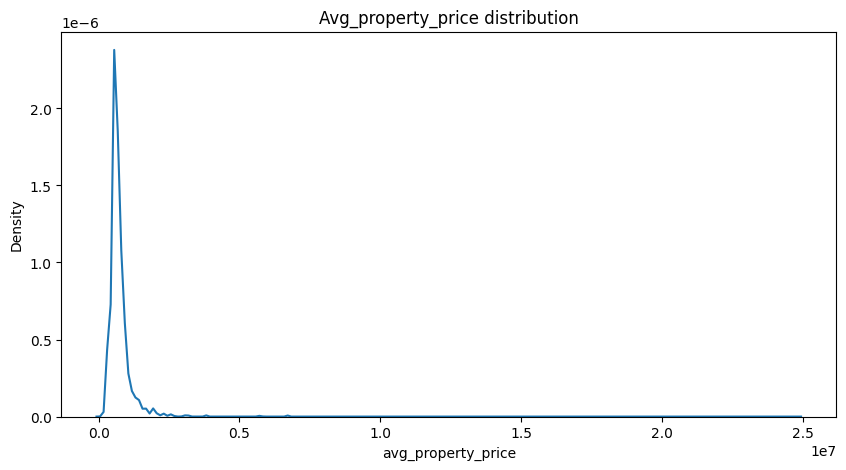

In [27]:
# plot the distribution of avg_property_price
plt.figure(figsize=(10, 5))
plt.title("Avg_property_price distribution")
sns.kdeplot(rental_df.avg_property_price)
plt.savefig("../plots/visualisation_features/All/8.avg_property_price_distribution.png")

### House

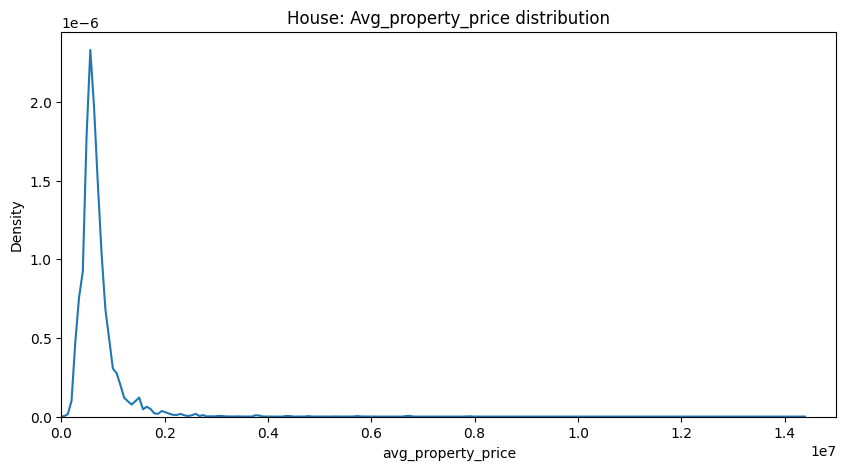

In [28]:
plt.figure(figsize=(10, 5))
plt.title("House: Avg_property_price distribution")
sns.kdeplot(house_df.avg_property_price)
plt.xlim(0, 15000000)
plt.savefig("../plots/visualisation_features/House/8.House_avg_property_price_distribution.png")

### Unit

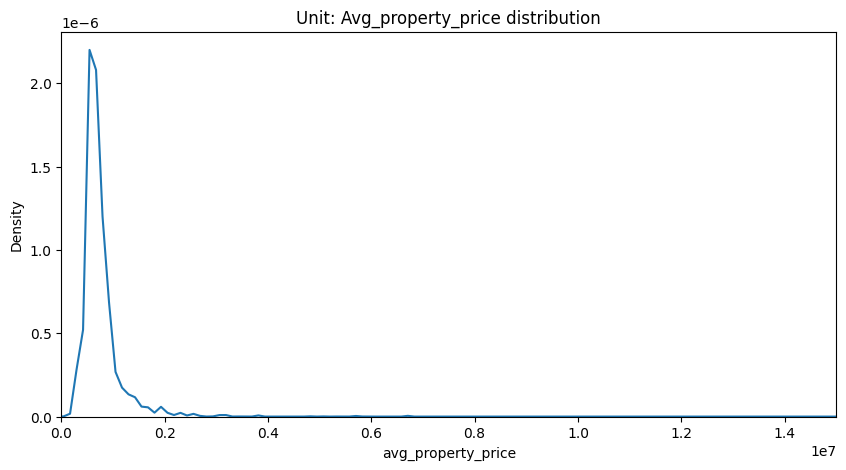

In [29]:
plt.figure(figsize=(10, 5))
plt.title("Unit: Avg_property_price distribution")
sns.kdeplot(unit_df.avg_property_price)
plt.xlim(0, 15000000)
plt.savefig("../plots/visualisation_features/Unit/8.Unit_avg_property_price_distribution.png")